<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/E0322052_RL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Final Results ===
True Reward Probabilities:      [0.2, 0.5, 0.75]
Estimated Reward Probabilities: [0.   0.   0.78]
Number of times each arm was selected: [ 1.  1. 98.]
Total Reward Earned:            76


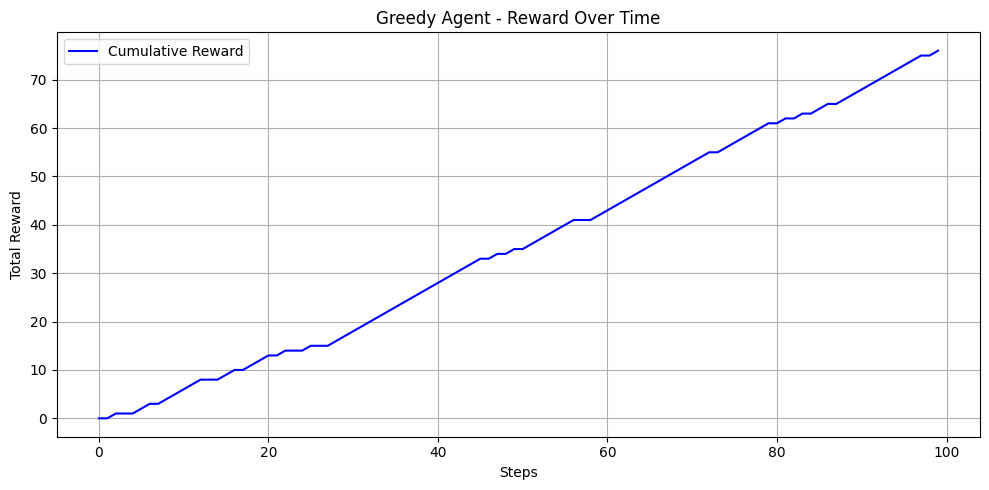

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_arms=3
true_rewards=[0.2,0.5,0.75]
n_steps=100

reward_sums = np.zeros(n_arms)        # Total reward per arm
counts = np.zeros(n_arms)             # How many times each arm pulled
estimated_rewards = np.zeros(n_arms)  # Estimated avg rewards per arm
reward_history = []                   # List of rewards (1 or 0)
cumulative_reward = []                # Cumulative reward over time

# Step 5: Initial pull of each arm once
for arm in range(n_arms):
    reward = int(np.random.rand() < true_rewards[arm])
    reward_sums[arm] += reward
    counts[arm] += 1
    estimated_rewards[arm] = reward_sums[arm] / counts[arm]
    reward_history.append(reward)
    cumulative_reward.append(sum(reward_history))

for step in range(n_arms, n_steps):
    # Choose best arm (greedy)
    arm = np.argmax(estimated_rewards)

    # Simulate reward
    reward = int(np.random.rand() < true_rewards[arm])

    # Update statistics
    reward_sums[arm] += reward
    counts[arm] += 1
    estimated_rewards[arm] = reward_sums[arm] / counts[arm]

    # Track rewards
    reward_history.append(reward)
    cumulative_reward.append(cumulative_reward[-1] + reward)

# Step 7: Print final results
print("\n=== Final Results ===")
print("True Reward Probabilities:     ", true_rewards)
print("Estimated Reward Probabilities:", np.round(estimated_rewards, 2))
print("Number of times each arm was selected:", counts)
print("Total Reward Earned:           ", int(sum(reward_history)))

# Step 8: Plot reward trend
plt.figure(figsize=(10, 5))
plt.plot(cumulative_reward, label="Cumulative Reward", color='blue')
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.title("Greedy Agent - Reward Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


=== Final Results ===
True Reward Probabilities:       [0.2, 0.5, 0.75]
Estimated Reward Probabilities: [0.33 0.5  0.73]
Number of times each arm was selected: [ 6.  6. 88.]
Total Reward Earned:             69


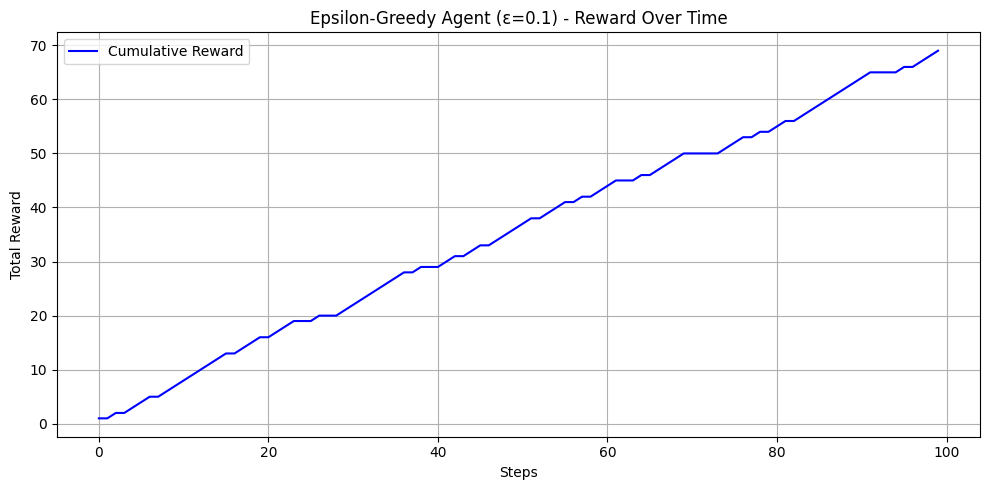

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_arms = 3
true_rewards = [0.2, 0.5, 0.75]
n_steps = 100
epsilon = 0.1  # Probability of choosing a random arm (exploration)

reward_sums = np.zeros(n_arms)
counts = np.zeros(n_arms)
estimated_rewards = np.zeros(n_arms)
reward_history = []
cumulative_reward = []

# Step 5: Initial pull of each arm once (to seed estimates)
for arm in range(n_arms):
    reward = int(np.random.rand() < true_rewards[arm])
    reward_sums[arm] += reward
    counts[arm] += 1
    estimated_rewards[arm] = reward_sums[arm] / counts[arm]
    reward_history.append(reward)
    cumulative_reward.append(sum(reward_history))

for step in range(n_arms, n_steps):
    # Epsilon-greedy selection
    if np.random.rand() < epsilon:
        arm = np.random.choice(n_arms)  # Explore: random arm
    else:
        arm = np.argmax(estimated_rewards)  # Exploit: best estimate

    # Simulate reward
    reward = int(np.random.rand() < true_rewards[arm])

    # Update statistics
    reward_sums[arm] += reward
    counts[arm] += 1
    estimated_rewards[arm] = reward_sums[arm] / counts[arm]

    # Track rewards
    reward_history.append(reward)
    cumulative_reward.append(cumulative_reward[-1] + reward)

# Step 7: Print final results
print("\n=== Final Results ===")
print("True Reward Probabilities:      ", true_rewards)
print("Estimated Reward Probabilities:", np.round(estimated_rewards, 2))
print("Number of times each arm was selected:", counts)
print("Total Reward Earned:            ", int(sum(reward_history)))

# Step 8: Plot reward trend
plt.figure(figsize=(10, 5))
plt.plot(cumulative_reward, label="Cumulative Reward", color='blue')
plt.xlabel("Steps")
plt.ylabel("Total Reward")
plt.title(f"Epsilon-Greedy Agent (ε={epsilon}) - Reward Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()